In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
from matplotlib.colors import TwoSlopeNorm

from src.gan import * 
import pickle 
import seaborn as sns

In [2]:
def get_device():
    """Get the appropriate device for computation"""
    if torch.cuda.is_available():
        return torch.device('cuda:3')
    return torch.device('cpu')

def get_generators(n_dim, n_channel, checkpoint_gen, task):
    device = get_device()
    with open(f'saved_model/LieGAN/{task}/args_{task}.pkl', 'rb') as f:
        args = pickle.load(f)

    generator = LieGenerator(n_dim, n_channel, args)
    checkpoint_gen = torch.load(checkpoint_gen, map_location=device)
    generator.load_state_dict(checkpoint_gen)
    generator = generator.to(device)

    return np.stack([x.detach().cpu().numpy() for x in generator.getLi()], axis=1).squeeze()

def plot_enhanced_lie_algebra(matrix, name, save_path=None):
    """Plot an enhanced version of the Lie algebra matrix"""
    # Determine figure size based on matrix dimensions
    n = matrix.shape[0]
    figsize = (6, 5) if n <= 4 else (10, 8)
    
    plt.figure(figsize=figsize)
    
    # Compute appropriate vmin and vmax for symmetric color scaling
    max_abs_val = np.max(np.abs(matrix))
    vmin, vmax = -max_abs_val, max_abs_val
    
    # Create a custom norm for better color distribution
    norm = TwoSlopeNorm(vmin=vmin, vcenter=0, vmax=vmax)
    
    # Determine annotation size based on matrix dimensions
    annot_size = 10 if n <= 4 else 8 if n <= 6 else 6
    annot = True if n <= 8 else False  # Only annotate smaller matrices
    
    # Create the heatmap
    ax = sns.heatmap(matrix, annot=annot, fmt=".2f", cmap="coolwarm", 
                    cbar=True, square=True, linewidths=0.5,
                    norm=norm, annot_kws={"size": annot_size})
    
    # Customize colorbar
    cbar = ax.collections[0].colorbar
    cbar.set_label('Matrix Value', rotation=270, labelpad=15, fontsize=12)
    
    # Set axis labels and ticks
    # if n <= 6:
    #     plt.xticks(np.arange(n) + 0.5, [f"$x_{{{i}}}$" for i in range(n)])
    #     plt.yticks(np.arange(n) + 0.5, [f"$x_{{{i}}}$" for i in range(n)], rotation=0)
    # else:
    #     # For larger matrices, just show some tick marks
    #     tick_indices = np.linspace(0, n-1, min(6, n)).astype(int)
    #     plt.xticks(tick_indices + 0.5, [f"$x_{{{i}}}$" for i in tick_indices])
    #     plt.yticks(tick_indices + 0.5, [f"$x_{{{i}}}$" for i in tick_indices], rotation=0)
    
    # Add title and adjust layout
    plt.title(f"Lie Algebra: {name}", fontsize=14, fontweight='bold', pad=10)
    plt.tight_layout()
    
    # Save if a path is provided
    if save_path:
        plt.savefig(save_path, dpi=300, bbox_inches='tight')
    
    plt.show()



In [3]:
# Define the systems
systems = [
    {"name": "Spring Mass", "n_dim": 2, "n_channel": 1, 
     "file": "saved_model/default/spring_mass_generator_99.pt", "task": "spring_mass"},
    
    {"name": "Pendulum", "n_dim": 2, "n_channel": 1, 
     "file": "saved_model/default/pendulum_generator_99.pt", "task": "pendulum"},
    
    {"name": "Two Body Dynamics", "n_dim": 8, "n_channel": 1, 
     "file": "saved_model/default/traj_pred_generator_499.pt", "task": "traj_pred"},
    
    {"name": "Lorentz Attractor", "n_dim": 3, "n_channel": 1, 
     "file": "saved_model/default/lorentz_generator_99.pt", "task": "lorentz"}
]

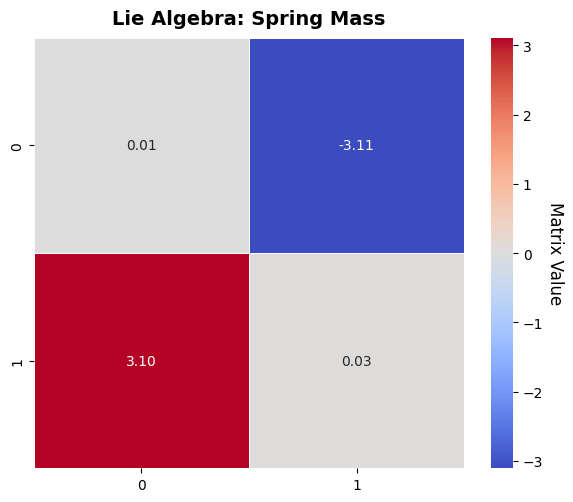

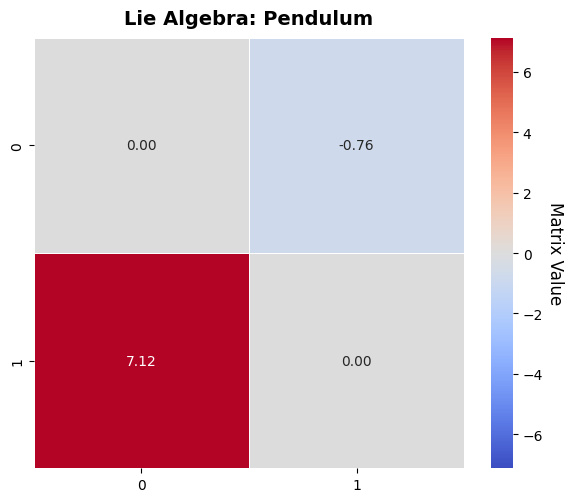

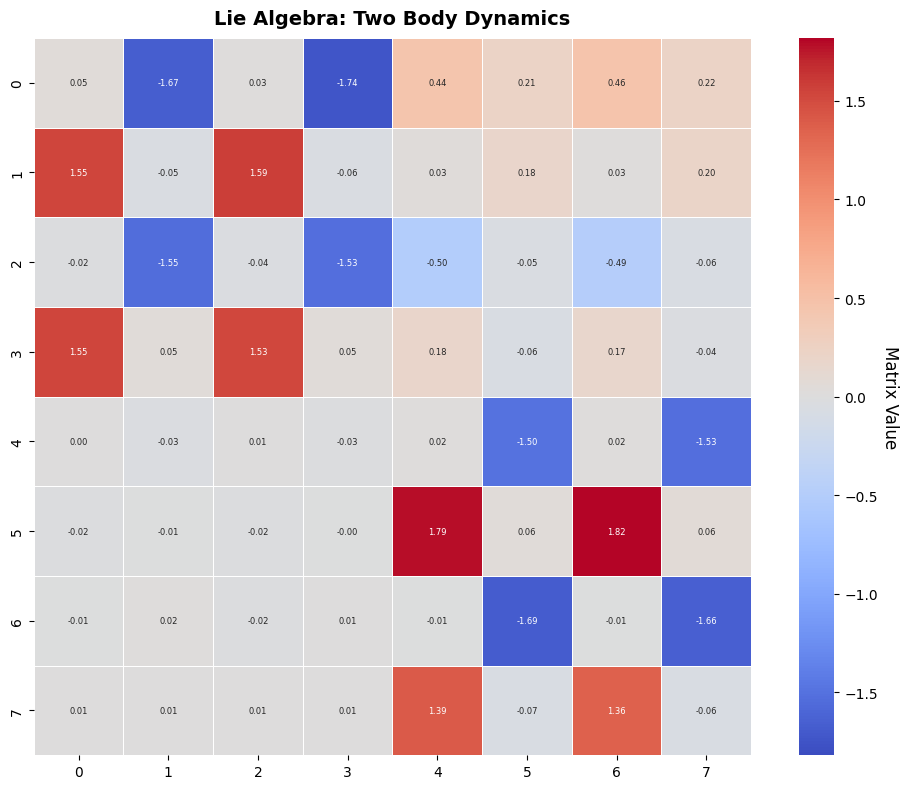

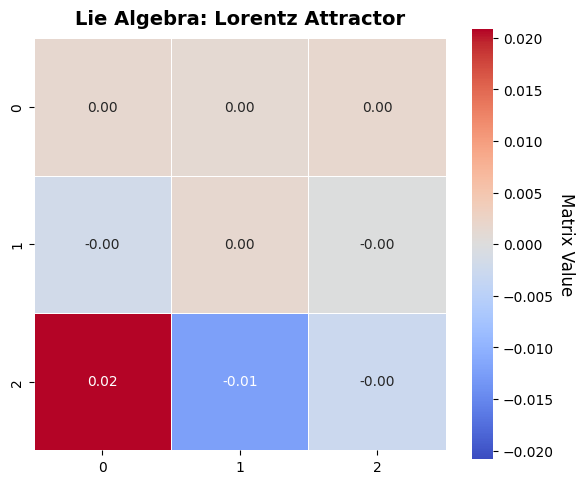

In [4]:
# Plot each system separately
for system in systems:
    lie_algebra = get_generators(
        system["n_dim"], 
        system["n_channel"], 
        system["file"], 
        system["task"]
    )
    
    save_path = f"{system['task']}_lie_algebra.png"
    plot_enhanced_lie_algebra(lie_algebra, system["name"], save_path)